# Logistic Regression

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

# read csv file

In [3]:
import pandas as pd
df = pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# check missing values in data frame

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: title={'center': 'count plot for species'}, xlabel='species'>

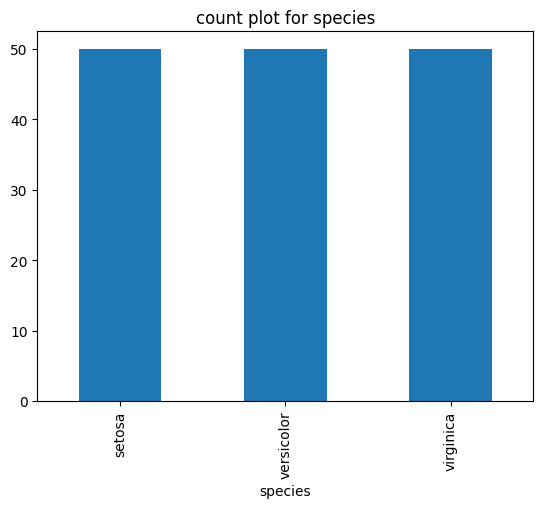

In [7]:
df['species'].value_counts().plot(kind= 'bar', title= 'count plot for species')

# Seperate X and Y(Species)

In [11]:
X = df.drop(columns=['species'])
Y = df[['species']]

In [12]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [13]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


# Label Encode the Species

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y['species'] = le.fit_transform(Y['species'])

In [15]:
Y.head()

,species
0,0
1,0
2,0
3,0
4,0


In [16]:
Y.value_counts()

species
0          50
1          50
2          50
Name: count, dtype: int64

# Preprocessing for X features

In [17]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [20]:
num_pipe = Pipeline(steps=[('imputer',SimpleImputer(strategy='mean')),
                           ('scaler', StandardScaler())])

In [21]:
X_pre = num_pipe.fit_transform(X)
X_pre

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [22]:
cols = num_pipe.get_feature_names_out()
cols

array(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'],
      dtype=object)

In [24]:
X_pre = pd.DataFrame(X_pre, columns=cols)
X_pre

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


# train test split

In [25]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.33, random_state=42)

In [26]:
xtrain.shape

(100, 4)

In [28]:
xtest.shape

(50, 4)

# Build a Logistic regression model

In [29]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [30]:
model.score(xtrain,ytrain)

0.96

In [31]:
model.score(xtest,ytest)

0.98

# Predicting Train and Test data

In [32]:
ypred_tr = model.predict(xtrain)
ypred_ts = model.predict(xtest)

In [33]:
ypred_tr[0:5]

array([1, 2, 1, 0, 2])

In [34]:
ytrain.head()

,species
96,1
105,2
66,1
0,0
122,2


In [35]:
ypred_ts[0:5]

array([1, 0, 2, 1, 1])

In [36]:
ytest.head()

,species
73,1
18,0
118,2
78,1
76,1


# # Plotting Confusion matrix for test data

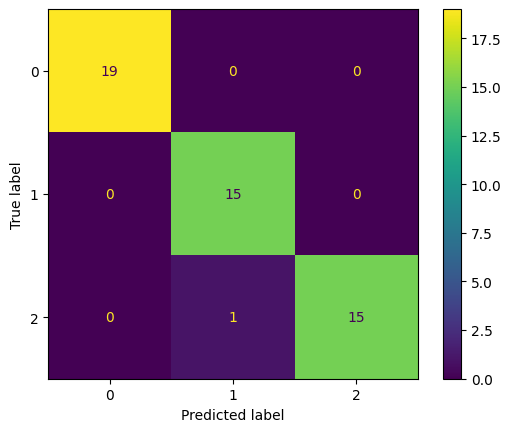

In [38]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(ytest, ypred_ts)
cfd = ConfusionMatrixDisplay(cf, display_labels=model.classes_)
cfd.plot()

# Print classification report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred_ts))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        15
           2       1.00      0.94      0.97        16

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



# Getting Orignal labels with le.inverse_transform

In [40]:
ypred_tr_lb = le.inverse_transform(ypred_tr)
ypred_ts_lb = le.inverse_transform(ypred_ts)

In [42]:
ypred_tr_lb

array(['versicolor', 'virginica', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'versicolor', 'setosa',
       'versicolor', 'virginica', 'setosa', 'versicolor', 'virginica',
       'setosa', 'virginica', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'setosa', 'setosa', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'virginica', 'virginica', 'virginica', 'versicolor',
       'setosa', 'setosa', 'virginica', 'virginica', 'setosa', 'setosa',
       'setosa', 'versicolor', 'virginica', 'setosa', 'virginica',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor', 'setosa',
       'versicolor'

In [41]:
ypred_ts_lb

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor',
       'virginica', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'virginica', 'virginica', 'virginica',
       'virginica', 'virginica', 'setosa', 'setosa', 'setosa', 'setosa',
       'versicolor', 'setosa', 'setosa', 'virginica', 'versicolor',
       'setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'virginica'], dtype=object)